# Simple Formular Estimator

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

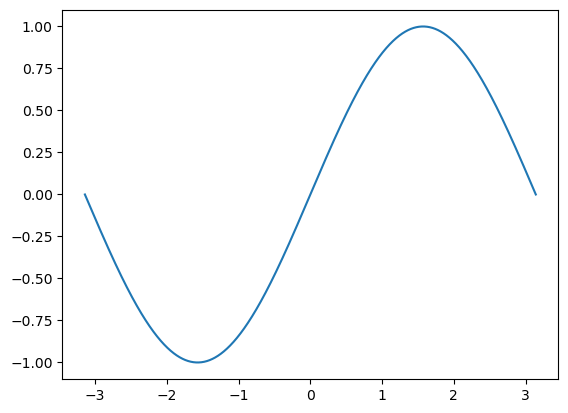

In [2]:
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)
plt.plot(x,y)

In [3]:
class F:
    a = np.random.randn()
    b = np.random.randn()
    c = np.random.randn()
    d = np.random.randn()
    learning_rate = 1e-6
    losses = []

    def forward(self, x):
        self.y_pred = self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
        return self.y_pred

    def backward(self, x, y, y_pred):
        self.losses.append(np.square(y_pred - y).sum())

        grad_y_pred = 2.0 * (y_pred - y)
        grad_a = grad_y_pred.sum()
        grad_b = (grad_y_pred * x).sum()
        grad_c = (grad_y_pred * x ** 2).sum()
        grad_d = (grad_y_pred * x ** 3).sum()

        self.a -= self.learning_rate * grad_a
        self.b -= self.learning_rate * grad_b
        self.c -= self.learning_rate * grad_c
        self.d -= self.learning_rate * grad_d

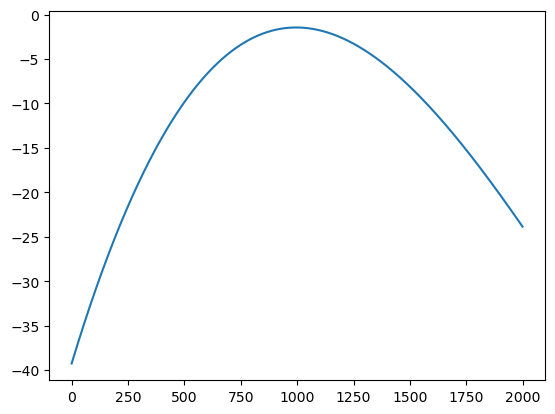

In [4]:
net = F()
plt.plot(net.forward(x))

In [5]:
for t in range(2000):
    y_pred = net.forward(x)
    net.backward(x, y, y_pred)

Result: y = -0.028078561837271806 + 0.8413417812247356 x + 0.004844019146215122 x^2 + -0.09114000658878202 x^3


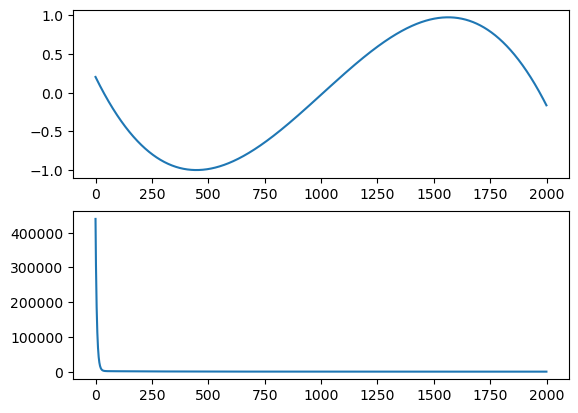

In [6]:
fig, axs = plt.subplots(2,1)
axs[0].plot(net.forward(x))
axs[1].plot(net.losses)
print(f'Result: y = {net.a} + {net.b} x + {net.c} x^2 + {net.d} x^3')